# Машинное обучение в биологии

### Семинар 2: Основные понятия и простейшие модели машинного обучения

#### Учимся на геномных эмбеддингах. Работа с веществами в Python. Классификация веществ и проблемы разбиения их на обучение и тест.

In [84]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.datasets
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


sns.set()
sns.set_style("whitegrid")

### Задача 1: Предсказание растворимости белков

В этой задаче предлагается произвести предсказание растворимости различных белков, используя их физико-химические свойства и белковый состав.

In [51]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1KNyRSO87bQF0NFVwHQD2TynthsoplAZO' -O solubility_data.csv

--2022-09-26 21:01:35--  https://docs.google.com/uc?export=download&id=1KNyRSO87bQF0NFVwHQD2TynthsoplAZO
Resolving docs.google.com (docs.google.com)... 74.125.203.113, 74.125.203.138, 74.125.203.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.203.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-50-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9923c1p07g7c99ipcdgsorom9aubidri/1664226075000/10688067377005935076/*/1KNyRSO87bQF0NFVwHQD2TynthsoplAZO?e=download&uuid=d0112004-25b7-46e3-b651-e82e12998a9a [following]
--2022-09-26 21:01:36--  https://doc-0s-50-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9923c1p07g7c99ipcdgsorom9aubidri/1664226075000/10688067377005935076/*/1KNyRSO87bQF0NFVwHQD2TynthsoplAZO?e=download&uuid=d0112004-25b7-46e3-b651-e82e12998a9a
Resolving doc-0s-50-docs.googleusercontent.com (doc-0s-50-docs.googleusercontent.com)... 142.250.157.132, 2404:6800

Датасет `solubility_data.csv` загружен за вас, определены `X` и `y`.

In [52]:
sol = pd.read_csv("./solubility_data.csv", header=0, index_col=0)
sol.head(3)

,solubility,protein_sasa,length,molecular_weight,instability_index,isoelectric_point,helix_fraction,turn_fraction,sheet_fraction,reduced_molar_extinction_coefficient,...,A2,B2,C2,A3,B3,C3,A4,B4,C4,TM
uniprot_id,,,,,,,,,,,,,,,,,,,,,
P32643,78,14538.357720,293,33936.5675,40.259795,5.866034,0.310580,0.208191,0.187713,59360,...,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0
Q46829,70,19283.018950,470,54516.1438,34.295149,5.655559,0.329787,0.214894,0.225532,111160,...,279,1.1,92.5,0,0.0,0.0,0,0.0,0,0
P65556,19,8407.794332,157,17692.5095,54.505159,4.679577,0.286624,0.165605,0.312102,24980,...,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0


In [53]:
X = sol.iloc[:,1:]
y = sol["solubility"]

**Разбейте X и y на тренировочную и тестовую выборки**, как в лекции. Соотношение train/test поставьте равным 4:1.\
*Подсказка*: воспользуйтесь функцией `train_test_split`.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=777)

**Осуществите стандартизацию признаков в выборке**.

In [55]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Импортируйте модель регрессии k-NN и обучите ее (`model.fit`)**.\
*Вопрос*: на какой части выборки происходит обучение: тренировочной или тестовой?

In [56]:
model = KNeighborsRegressor()
model.fit(X_train, y_train) #Обучение происходит на тренировочной выборке

KNeighborsRegressor()

**Получите предсказание на оставшейся выборке**. Оцените его качество метриками RMSE, MAE.

In [57]:
y_pred = model.predict(X_test)
print(f'MSE: {mean_squared_error(y_true=y_test, y_pred=y_pred)}')
print(f'MAE: {mean_absolute_error(y_true=y_test, y_pred=y_pred)}')

MSE: 792.9449462365591
MAE: 24.182795698924732


Следующая функция строит график зависимости качества на тестовой и тренировочной выборках от параметра модели.\
Измените помеченную строку в функции так, чтобы ее можно было использовать **для построения графика зависимости качества от количества соседей для модели k-NN**.

In [69]:
from sklearn.metrics import mean_squared_error

def make_qual_chart(X_train, X_test, y_train, y_test, metric=mean_squared_error, limit=50):
    train_quals = np.zeros(limit)
    test_quals = np.zeros(limit)
    param_range = np.arange(1, limit + 1)
    
    for ind, value in enumerate(param_range):
        ### CHANGE THE NEXT LINE!
        model = KNeighborsRegressor(value)
        # FIT
        model.fit(X_train, y_train)
        # PREDICT
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        # EVALUATE QUALITY
        train_quals[ind] = metric(y_true=y_train, y_pred=y_train_pred)
        test_quals[ind] = metric(y_true=y_test, y_pred=y_test_pred)
    
    baseline = metric(y_true=y_test, y_pred=np.full_like(y_test, y_train.mean()))
    
    # TRACING CHART
    plt.figure(figsize=(10, 7))
    plt.plot(param_range, train_quals, label="Train")
    plt.plot(param_range, test_quals, label="Test")
    plt.axhline(baseline, color="k", ls="--", lw=1.5, label="Baseline")
    plt.xlabel("Количество соседей")
    plt.ylabel("MSE")
    plt.legend()
    plt.show()
    return param_range, train_quals, test_quals

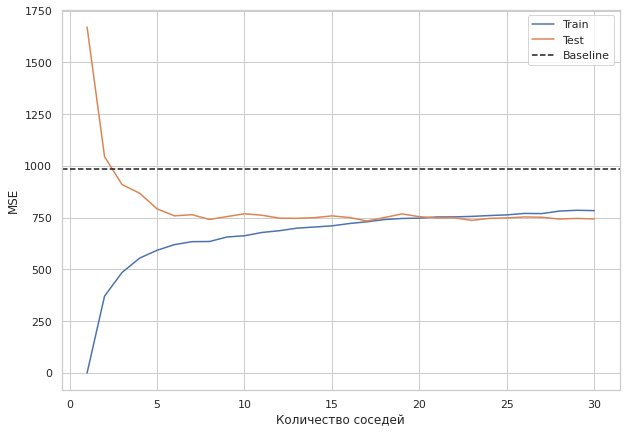

In [70]:
make_qual_chart(X_train, X_test, y_train, y_test, metric=mean_squared_error, limit=30);

Сделайте вывод о том, **какое число соседей является оптимальным для данной задачи**.

_Предполагаю, что оптимальным числом соседей k в данном случе будет не более 10, исходя из графика можно выбрать k=8(после этого числа соседей ошибка на тестовой выборке не увеличивается)._

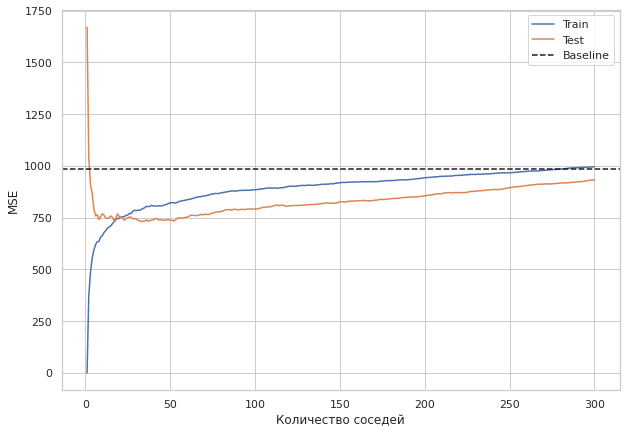

In [72]:
make_qual_chart(X_train, X_test, y_train, y_test, metric=mean_squared_error, limit=300);

_Хочется отметить, что если построить график (см.выше) от бОльшего числа соседей, то чётко прослеживается увеличение ошибки после k=50 на тестовой выборке, далее обе ошибки (на тренировочной и на тестовой выборках) монотонно возрастают._

### Задача 2: Обучение на геномных эмбеддингах

В этой задаче предлагается произвести трехклассовую классификацию разных однонуклеотидных замен в ДНК, основываясь на их нейросетевых геномных эмбеддингах.

In [73]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1RDTcTnhOcMX4DnJbzdPalWENNFtXi2r8' -O tfs_deepsea.csv

--2022-09-26 21:20:37--  https://docs.google.com/uc?export=download&id=1RDTcTnhOcMX4DnJbzdPalWENNFtXi2r8
Resolving docs.google.com (docs.google.com)... 74.125.203.113, 74.125.203.100, 74.125.203.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.203.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-50-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pdo4ecju239jg4d98itaqe5gic2dhg2t/1664227200000/10688067377005935076/*/1RDTcTnhOcMX4DnJbzdPalWENNFtXi2r8?e=download&uuid=f7302d58-8683-44aa-bd16-2767644432ea [following]
--2022-09-26 21:20:38--  https://doc-00-50-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pdo4ecju239jg4d98itaqe5gic2dhg2t/1664227200000/10688067377005935076/*/1RDTcTnhOcMX4DnJbzdPalWENNFtXi2r8?e=download&uuid=f7302d58-8683-44aa-bd16-2767644432ea
Resolving doc-00-50-docs.googleusercontent.com (doc-00-50-docs.googleusercontent.com)... 142.250.157.132, 2404:6800

Загрузите датасет `tfs_deepsea.csv`, в качестве `y` используйте колонку `Direction`, в качестве `X` - все колонки, начиная с девятой.

In [74]:
tfs = pd.read_csv("tfs_deepsea.csv", header=0)
tfs.head(3)

,Chrom,Pos,Ref,Alt,Value,Confidence,Direction,construction,alt@BRCA1@ds_HepG2_normal,alt@CTCF@ds_HCM_normal,...,ref@GATA3@ds_MCF-7_normal,ref@JunD@ds_H1-hESC_None.1,ref@MafK@ds_K562_normal,ref@NRSF@ds_A549_EtOH_0.02pct,ref@Pol2-4H8@ds_GM12891_normal,ref@Pol2@ds_GM12878_None.2,ref@Pol2@ds_GM12878_None.3,ref@Pol2@ds_GM12878_normal,ref@c-Fos@ds_K562_normal,ref@c-Myc@ds_K562_normal
0,9,104195582,G,C,-0.009418,0.001075,0,ALDOB,0.000056,0.000949,...,0.00934,0.000637,0.082889,0.007880,0.000568,0.000095,0.000287,0.000147,0.000588,0.001214
1,9,104195582,G,T,-0.212088,0.034187,0,ALDOB,0.000051,0.000857,...,0.00934,0.000637,0.082889,0.007880,0.000568,0.000095,0.000287,0.000147,0.000588,0.001214
2,9,104195700,T,A,0.709840,0.364072,1,ALDOB,0.000089,0.001784,...,0.00292,0.001019,0.100890,0.004289,0.000554,0.000142,0.000209,0.000282,0.001091,0.000891


In [106]:
X = tfs.iloc[:, 9:]
y = tfs['Direction']

In [107]:
X.head()

,alt@CTCF@ds_HCM_normal,alt@DNase@ds_GM06990_normal,alt@DNase@ds_HRE_normal,alt@ELF1@ds_GM12878_normal,alt@GATA-1@ds_PBDE_normal,alt@GR@ds_A549_DEX_500pM,alt@H3K4me3@ds_NHDF-Ad_normal,alt@H3K9me3@ds_NHLF_normal,alt@NRSF@ds_H1-hESC_normal,alt@POU5F1@ds_H1-hESC_normal,...,ref@GATA3@ds_MCF-7_normal,ref@JunD@ds_H1-hESC_None.1,ref@MafK@ds_K562_normal,ref@NRSF@ds_A549_EtOH_0.02pct,ref@Pol2-4H8@ds_GM12891_normal,ref@Pol2@ds_GM12878_None.2,ref@Pol2@ds_GM12878_None.3,ref@Pol2@ds_GM12878_normal,ref@c-Fos@ds_K562_normal,ref@c-Myc@ds_K562_normal
0,0.000949,0.005588,0.032168,0.000060,0.006015,0.000959,0.002953,0.000253,0.000443,0.000188,...,0.00934,0.000637,0.082889,0.007880,0.000568,0.000095,0.000287,0.000147,0.000588,0.001214
1,0.000857,0.006543,0.027380,0.000060,0.005420,0.000793,0.002678,0.000259,0.000400,0.000170,...,0.00934,0.000637,0.082889,0.007880,0.000568,0.000095,0.000287,0.000147,0.000588,0.001214
2,0.001784,0.008986,0.161180,0.000086,0.004401,0.001779,0.008086,0.001602,0.001637,0.000405,...,0.00292,0.001019,0.100890,0.004289,0.000554,0.000142,0.000209,0.000282,0.001091,0.000891
3,0.001538,0.008108,0.118170,0.000090,0.004464,0.001636,0.008273,0.001479,0.001845,0.000566,...,0.00292,0.001019,0.100890,0.004289,0.000554,0.000142,0.000209,0.000282,0.001091,0.000891
4,0.001784,0.008564,0.156840,0.000102,0.004632,0.002136,0.009151,0.001432,0.001930,0.000493,...,0.00292,0.001019,0.100890,0.004289,0.000554,0.000142,0.000209,0.000282,0.001091,0.000891


**Разбейте X и y на тренировочную и тестовую выборки**, как в лекции. Соотношение train/test поставьте равным 4:1.\
*Подсказка*: воспользуйтесь функцией `train_test_split`.

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

**Осуществите стандартизацию признаков в выборке**.

In [109]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Импортируйте модель логистической регрессии и обучите ее на соответствующей части выборки (`model.fit`)**.

In [110]:
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

**Получите предсказание на оставшейся выборке**. Оцените его качество метриками из отчета о классификации (`classification_report`).

In [112]:
y_pred = model.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred, zero_division=1))

              precision    recall  f1-score   support

          -1       0.71      0.53      0.61        32
           0       0.88      0.95      0.91       161
           1       0.00      0.00      0.00         7

    accuracy                           0.85       200
   macro avg       0.53      0.49      0.51       200
weighted avg       0.82      0.85      0.83       200



Разбейте X и y на тренировочную и тестовую выборки, **так, как указано в ячейке ниже**. Повторите все шаги, чтобы определить качество классификации.

In [113]:
X_train = X[tfs["construction"] == "ECR11"].values
X_test = X[tfs["construction"] == "ALDOB"].values
y_train = y[tfs["construction"] == "ECR11"].values
y_test = y[tfs["construction"] == "ALDOB"].values

In [114]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [115]:
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [116]:
y_pred = model.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred, zero_division=1))

              precision    recall  f1-score   support

          -1       0.20      0.87      0.33        94
           0       1.00      0.00      0.00       382
           1       0.06      0.21      0.09        24

    accuracy                           0.17       500
   macro avg       0.42      0.36      0.14       500
weighted avg       0.80      0.17      0.07       500



**Сделайте выводы об изменении качества**.

_После изменения выборки качество сильно упало (а в одном из классов recall вообще стал нулевым, а precision 1, что тем более нехорошо), можно сделать вывод о неудачном работе модели на предложенных выше данных._

### Задача 3: Классификация химических веществ

In [119]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1SYdyTbPD01GYcdz7hkyWZGoA5RV44fg7' -O bace.csv

--2022-09-26 22:09:16--  https://docs.google.com/uc?export=download&id=1SYdyTbPD01GYcdz7hkyWZGoA5RV44fg7
Resolving docs.google.com (docs.google.com)... 74.125.203.101, 74.125.203.138, 74.125.203.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.203.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-50-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9886t71m8262rine8sj7fk0k5jifllpt/1664230125000/10688067377005935076/*/1SYdyTbPD01GYcdz7hkyWZGoA5RV44fg7?e=download&uuid=438c6dc9-c002-4131-8fec-f424cad7f9d0 [following]
--2022-09-26 22:09:18--  https://doc-0c-50-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9886t71m8262rine8sj7fk0k5jifllpt/1664230125000/10688067377005935076/*/1SYdyTbPD01GYcdz7hkyWZGoA5RV44fg7?e=download&uuid=438c6dc9-c002-4131-8fec-f424cad7f9d0
Resolving doc-0c-50-docs.googleusercontent.com (doc-0c-50-docs.googleusercontent.com)... 142.250.157.132, 2404:6800

Датасет [BACE](http://moleculenet.ai/datasets-1) загружен за вас, определены `X`, `y` и `smiles`.

In [120]:
bace = pd.read_csv("./bace.csv", header=0)
bace.head(3)

,mol,CID,Class,Model,pIC50,MW,AlogP,HBA,HBD,RB,...,PEOE6 (PEOE6),PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),canvasUID
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,BACE_1,1,Train,9.154901,431.56979,4.4014,3,2,5,...,53.205711,78.640335,226.85541,107.43491,37.133846,0.000000,7.980170,0.0,0.000000,1
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,BACE_2,1,Train,8.853872,657.81073,2.6412,5,4,16,...,73.817162,47.171600,365.67694,174.07675,34.923889,7.980170,24.148668,0.0,24.663788,2
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_3,1,Train,8.698970,591.74091,2.5499,4,3,11,...,70.365707,47.941147,192.40652,255.75255,23.654478,0.230159,15.879790,0.0,24.663788,3


In [121]:
X = bace.iloc[:,4:].values
y = bace["Class"].values
smiles = bace["mol"].values

**Разбейте X и y на тренировочную и тестовую выборки**, как в лекции. Соотношение train/test поставьте равным 3:1.\
*Подсказка*: воспользуйтесь функцией `train_test_split`.

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=777)

**Осуществите стандартизацию признаков в выборке**.

In [123]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Импортируйте модель логистической регрессии и обучите ее на соответствующей части выборки (`model.fit`)**.

In [124]:
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

**Получите предсказание на оставшейся выборке**. Оцените его качество метриками из отчета о классификации (`classification_report`).

In [126]:
y_pred = model.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       212
           1       0.92      0.93      0.93       167

    accuracy                           0.94       379
   macro avg       0.94      0.94      0.94       379
weighted avg       0.94      0.94      0.94       379



Функция `fingerprint_train_test_split`, приведенная ниже, осуществляет **разбиение train/test на основании молекулярных "отпечатков" (molecular fingerprints)**. Воспользуйтесь ей, чтобы получить **неслучайное разбиение на train/test** и повторите предыдущие шаги, чтобы оценить качество модели на таком случае.

In [127]:
!pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 36.8 MB 26 kB/s 


In [129]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs

In [130]:
def _split_fingerprints(fps, size1, size2):
    """This is called by fingerprint_train_test_split to divide a list of fingerprints into
    two groups.
    """
    assert len(fps) == size1 + size2

    # Begin by assigning the first molecule to the first group.

    fp_in_group = [[fps[0]], []]
    indices_in_group = ([0], [])
    remaining_fp = fps[1:]
    remaining_indices = list(range(1, len(fps)))
    max_similarity_to_group = [
        DataStructs.BulkTanimotoSimilarity(fps[0], remaining_fp),
        [0] * len(remaining_fp)
    ]
    while len(remaining_fp) > 0:
    # Decide which group to assign a molecule to.
        group = 0 if len(fp_in_group[0]) / size1 <= len(
            fp_in_group[1]) / size2 else 1

        # Identify the unassigned molecule that is least similar to everything in
        # the other group.

        i = np.argmin(max_similarity_to_group[1 - group])

        # Add it to the group.

        fp = remaining_fp[i]
        fp_in_group[group].append(fp)
        indices_in_group[group].append(remaining_indices[i])

        # Update the data on unassigned molecules.

        similarity = DataStructs.BulkTanimotoSimilarity(fp, remaining_fp)
        max_similarity_to_group[group] = np.delete(
            np.maximum(similarity, max_similarity_to_group[group]), i)
        max_similarity_to_group[1 - group] = np.delete(
            max_similarity_to_group[1 - group], i)
        del remaining_fp[i]
        del remaining_indices[i]
    return indices_in_group

In [131]:
def fingerprint_train_test_split(X, y, smiles, test_size=0.1):
    assert X.shape[0] == y.shape[0] == smiles.shape[0]
    mols = [Chem.MolFromSmiles(s) for s in smiles]
    fps = [AllChem.GetMorganFingerprintAsBitVect(x, 2, 1024) for x in mols]

    # Split into two groups: training set and everything else.

    test_size = int(test_size * len(y))
    train_size = len(y) - test_size
    train_inds, test_inds = _split_fingerprints(fps, train_size, test_size)
    
    X_train = X[train_inds,:]
    X_test = X[test_inds,:]
    y_train = y[train_inds]
    y_test = y[test_inds]
    
    return X_train, X_test, y_train, y_test

In [132]:
X_train, X_test, y_train, y_test = fingerprint_train_test_split(X, y, smiles, test_size=0.25)

In [133]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [134]:
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [135]:
y_pred = model.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89       174
           1       0.89      0.92      0.91       204

    accuracy                           0.90       378
   macro avg       0.90      0.89      0.90       378
weighted avg       0.90      0.90      0.90       378



**Сделайте выводы**.

---

При сравнении отчётов можно проследить, что разбиение на случайные данные с помощью train_test_split лишь немного лучше, чем разбиение по молекулярным отпечаткам. Это может свидетельствовать о крайней вариативности этих отпечатков (поскольку если бы они повторялись или были бы одинаковыми целыми кластерами, то качество было бы намного хуже)
Также это указывает на то, что можно получать хорошо работающие модели, которые не обучались на случайных данных, а с помощью другой (биологической в этом случае) информации об исследуемых объектах.